In [2]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [58]:
url_shapefile = (
    "https://github.com/gregoiredavid/france-geojson/raw/master/departements.geojson"
)
map_df = gpd.read_file(url_shapefile)  # Read the GeoJSON file into a GeoDataFrame

In [59]:
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


<Axes: >

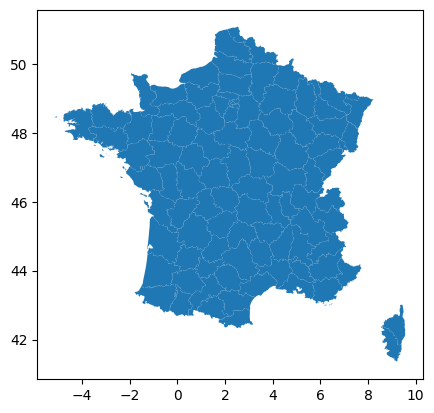

In [60]:
# now let's preview what our map looks like with no data in it
map_df.plot()

In [12]:
from etl import ETL

df_yield = pd.read_csv("data/barley_yield_from_1982.csv", sep=";")
df_climate = pd.read_parquet("data/climate_data_from_1982.parquet")

df_yield, df_climate = ETL(df_yield, df_climate).run()

--- df_climate---
Departments/Scenario dropped because of any missing values:                                    nom_dep  scenario
date                                                
2015-01-01 12:00:00               Calvados  ssp2_4_5
2015-01-01 12:00:00            Deux_Sevres  ssp2_4_5
2015-01-01 12:00:00                Essonne  ssp2_4_5
2015-01-01 12:00:00                   Eure  ssp2_4_5
2015-01-01 12:00:00                  Rhone  ssp2_4_5
2015-01-01 12:00:00        Tarn_et_Garonne  ssp2_4_5
2015-01-01 12:00:00  Territoire_de_Belfort  ssp2_4_5
2015-01-01 12:00:00               Vaucluse  ssp2_4_5
--- df_yield ---
Departments dropped because of almost absolute absence of data:
 ['Hauts_de_Seine' 'Paris' 'Seine_SeineOise']


In [54]:
from feature_creation import FeatureCreation

df_hist, df_forecast = FeatureCreation(df_yield, df_climate).run()

--- Amplitude feature created over months ---
--- Threshold days feature created over phases ---
--- Temperature categories feature created ---
--- Consecutive days feature created ---
--- Annual precipitation category feature created ---


In [61]:
buff = df_hist

In [62]:
map_df.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


In [63]:
df_hist.head()

,year,yield,area,production,scenario,nom_dep,code_dep,amp_daily_NSA_temp_1,amp_daily_NSA_temp_2,amp_daily_NSA_temp_3,...,maturation_within,total_above_consecutive_days_germination,total_above_consecutive_days_growth,total_above_consecutive_days_maturation,total_below_consecutive_days_germination,total_below_consecutive_days_growth,total_below_consecutive_days_maturation,annual_precip_below,annual_precip_within,annual_precip_above
0,1982,3.950080,16065.0,63458.0,historical,Ain,01,8.102631,12.605316,15.886414,...,51.0,0.0,0.0,0.0,7.0,25.0,6.0,0.0,0.0,1.0
1,1983,2.648276,14500.0,38400.0,historical,Ain,01,9.464539,17.021851,11.039673,...,37.0,0.0,0.0,0.0,9.0,46.0,12.0,0.0,0.0,1.0
2,1984,4.822580,15500.0,74750.0,historical,Ain,01,15.847443,9.180328,7.104919,...,40.0,0.0,0.0,0.0,5.0,31.0,9.0,0.0,0.0,1.0
3,1985,4.196770,15500.0,65050.0,historical,Ain,01,14.638794,13.399414,9.194336,...,39.0,0.0,0.0,0.0,10.0,32.0,11.0,0.0,0.0,1.0
4,1986,3.598450,12900.0,46420.0,historical,Ain,01,10.697601,11.505005,9.750580,...,38.0,0.0,0.0,0.0,14.0,19.0,10.0,0.0,0.0,1.0


In [ ]:
df_merged = pd.merge(map_df, df_hist, right_on="code_dep", left_on="code").drop(
    columns=["code", "nom"]
)
df_merged.head()

,geometry,year,yield,area,production,scenario,nom_dep,code_dep,amp_daily_NSA_temp_1,amp_daily_NSA_temp_2,...,maturation_within,total_above_consecutive_days_germination,total_above_consecutive_days_growth,total_above_consecutive_days_maturation,total_below_consecutive_days_germination,total_below_consecutive_days_growth,total_below_consecutive_days_maturation,annual_precip_below,annual_precip_within,annual_precip_above
0,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",1982,3.950080,16065.0,63458.0,historical,Ain,01,8.102631,12.605316,...,51.0,0.0,0.0,0.0,7.0,25.0,6.0,0.0,0.0,1.0
1,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",1983,2.648276,14500.0,38400.0,historical,Ain,01,9.464539,17.021851,...,37.0,0.0,0.0,0.0,9.0,46.0,12.0,0.0,0.0,1.0
2,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",1984,4.822580,15500.0,74750.0,historical,Ain,01,15.847443,9.180328,...,40.0,0.0,0.0,0.0,5.0,31.0,9.0,0.0,0.0,1.0
3,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",1985,4.196770,15500.0,65050.0,historical,Ain,01,14.638794,13.399414,...,39.0,0.0,0.0,0.0,10.0,32.0,11.0,0.0,0.0,1.0
4,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",1986,3.598450,12900.0,46420.0,historical,Ain,01,10.697601,11.505005,...,38.0,0.0,0.0,0.0,14.0,19.0,10.0,0.0,0.0,1.0


/var/folders/55/brtsb88x4wz9n5kxdtldl3940000gn/T/ipykernel_67033/2403245791.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(df_merged.geometry.centroid.x, df_merged.geometry.centroid.y, df_merged['nom_dep']):


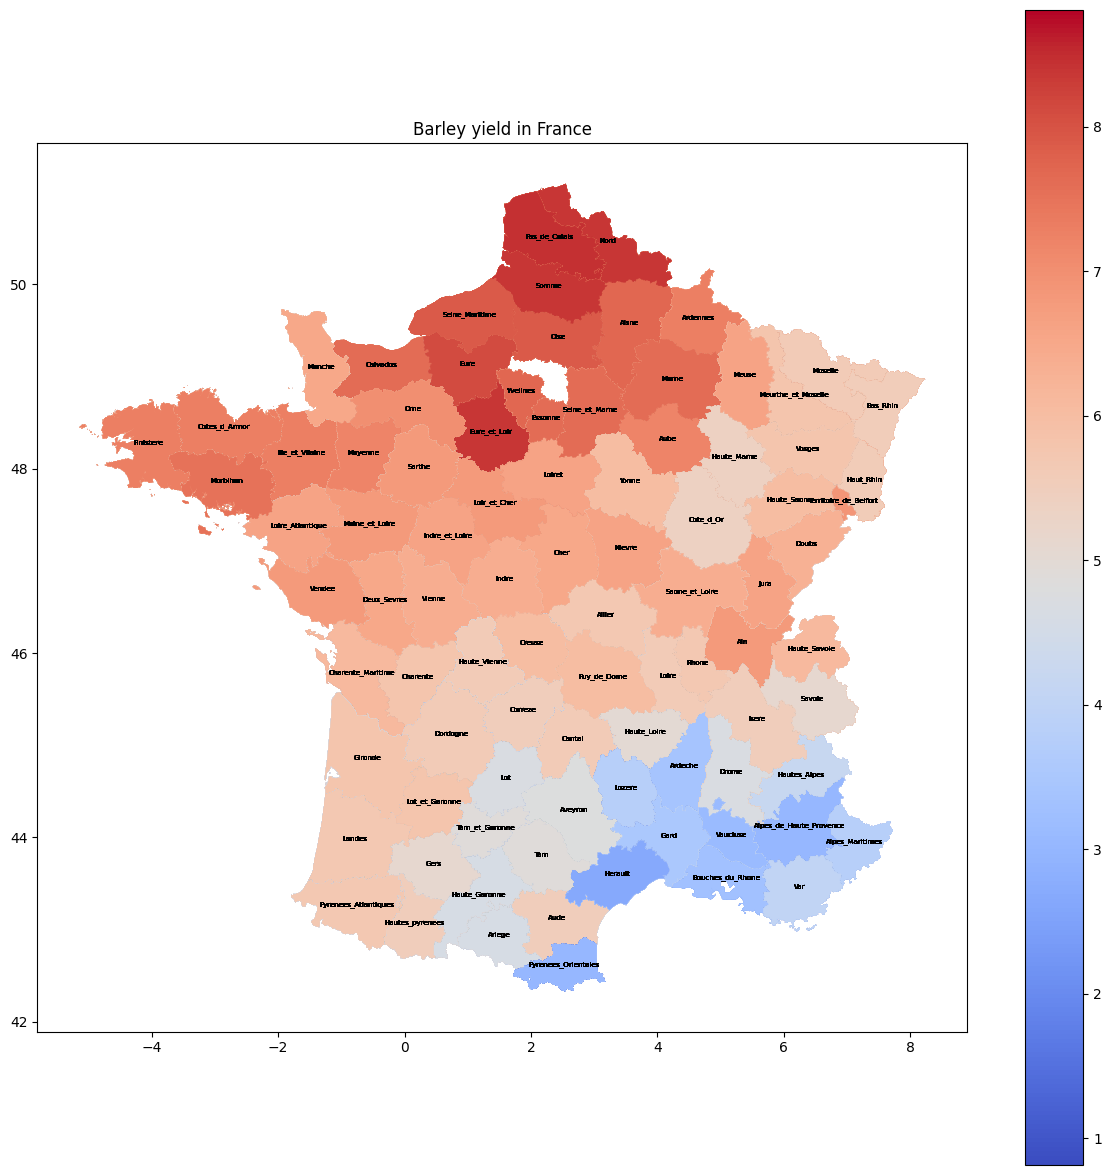

In [ ]:
# use the ddataframe df_merged to plot the map with columns "geometry" to
# define the polygons, "yield" for the color and "nom_dep" for the label

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_merged.plot(column="yield", ax=ax, legend=True, cmap="coolwarm")

# add label for each department
for x, y, label in zip(
    df_merged.geometry.centroid.x, df_merged.geometry.centroid.y, df_merged["nom_dep"]
):
    ax.text(x, y, label, fontsize=5, ha="center")

plt.title("Barley yield in France")
plt.show()

In [ ]:
df_merged[df_merged["nom_dep"] == "Bouches_du_Rhone"]["yield"].describe()

count    33.000000
mean      3.192389
std       0.462727
min       1.995789
25%       3.000000
50%       3.110430
75%       3.407530
max       4.200000
Name: yield, dtype: float64

# Creation of the gif


In [ ]:
import os

output_path = "charts/maps"
if not os.path.exists(output_path):
    os.makedirs(output_path)
# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = df_merged["year"].unique()

In [ ]:
df_merged.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [115]:
vmin, vmax = df_merged["yield"].min(), df_merged["yield"].max()
for year in list_of_years:
    # filter the data for the specific year
    df_year = df_merged[df_merged["year"] == year]

    # plot the map
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    df_year.plot(
        column="yield",
        ax=ax,
        legend=True,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        norm=plt.Normalize(vmin=vmin, vmax=vmax),
    )

    # add label for each department
    for x, y, label in zip(
        df_year.geometry.centroid.x, df_year.geometry.centroid.y, df_year["nom_dep"]
    ):
        ax.text(x, y, label, fontsize=5, ha="center")

    # Add big annotation of the year in bottom left corner
    ax.annotate(
        year,
        xy=(0, 0),
        xycoords="axes fraction",
        xytext=(20, 20),
        textcoords="offset points",
        ha="left",
        va="bottom",
        fontsize=20,
    )

    plt.title(f"Barley yield in France in {year}")
    plt.savefig(f"{output_path}/barley_yield_in_france_in_{year}.png")
    plt.close()

    i += 1

/var/folders/55/brtsb88x4wz9n5kxdtldl3940000gn/T/ipykernel_67033/1341105915.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year.geometry.centroid.x, df_year.geometry.centroid.y, df_year["nom_dep"]
/var/folders/55/brtsb88x4wz9n5kxdtldl3940000gn/T/ipykernel_67033/1341105915.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year.geometry.centroid.x, df_year.geometry.centroid.y, df_year["nom_dep"]
/var/folders/55/brtsb88x4wz9n5kxdtldl3940000gn/T/ipykernel_67033/1341105915.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_year.geometry.centroid.x, df_year

# Create gif


In [116]:
# Concat the images to make a gif

import imageio

images = []
for year in list_of_years:
    images.append(imageio.imread(f"{output_path}/barley_yield_in_france_in_{year}.png"))

duration = 5  # seconds
nb_frames = len(list_of_years)
fps = int(nb_frames / duration)

imageio.mimsave(f"GIFYield.gif", images, "GIF", fps=fps)

/var/folders/55/brtsb88x4wz9n5kxdtldl3940000gn/T/ipykernel_67033/2159430259.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"{output_path}/barley_yield_in_france_in_{year}.png"))
